### ***Perform exploratory analysis***

The columns of the dataset will be renamed later

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('seeds_dataset.csv', sep='\s+', header=None) # read dataset

In [ ]:
df.shape # check dataset dimensions

(210, 8)

In [ ]:
df.head() # visually see dataset to understand better

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df[7].unique() # 1, 2, 3 are the output values

array([1, 2, 3])

In [ ]:
df[df.isnull().any(axis=1)][range(8)] # check whether NaN values are there

,0,1,2,3,4,5,6,7


***no missing values present***

In [ ]:
df.info() # ensure pandas recognize all data types present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
df.describe().iloc[:, : 7] # get description of the feature columns

,0,1,2,3,4,5,6
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


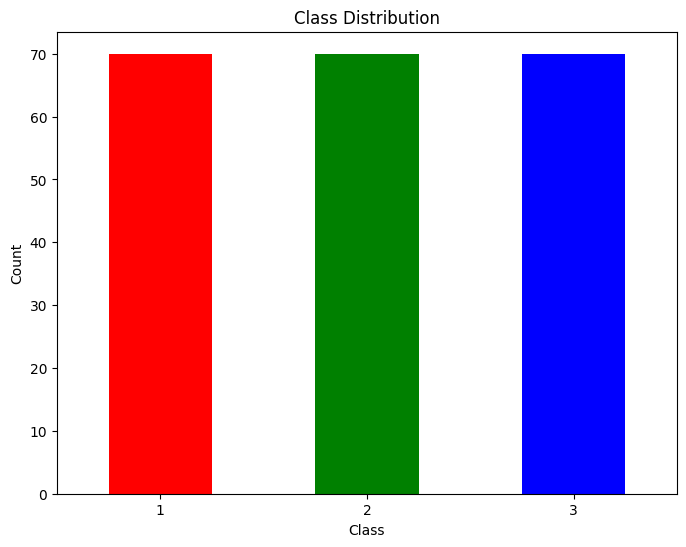

1    70
2    70
3    70
Name: 7, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

class_distribution = df[7].value_counts() # checking for class imbalances through bar chart

# plt code for the bar chart
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['r', 'g', 'b'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

df[7].value_counts()

***A very nicely balanced dataset indeed***

In [ ]:
df.iloc[:7].corr() # the correlation matrix (target column ignored)

,0,1,2,3,4,5,6,7
0,1.000000,0.960348,-0.093409,0.819465,0.615960,-0.466130,0.743910,NaN
1,0.960348,1.000000,-0.367125,0.941804,0.409054,-0.406159,0.847231,NaN
2,-0.093409,-0.367125,1.000000,-0.631863,0.580947,-0.092128,-0.541992,NaN
3,0.819465,0.941804,-0.631863,1.000000,0.178776,-0.276351,0.894736,NaN
4,0.615960,0.409054,0.580947,0.178776,1.000000,-0.605830,0.064918,NaN
5,-0.466130,-0.406159,-0.092128,-0.276351,-0.605830,1.000000,0.105578,NaN
6,0.743910,0.847231,-0.541992,0.894736,0.064918,0.105578,1.000000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***For this classification task using ANN, low correlation between features are preffered***

***low correlation between features mean each feature contributes to the classification considerably, no repetitive same kind of features***

***

***We can see that this dataset has fairly low correlation between features, so its good, although only fairly but acceptable***

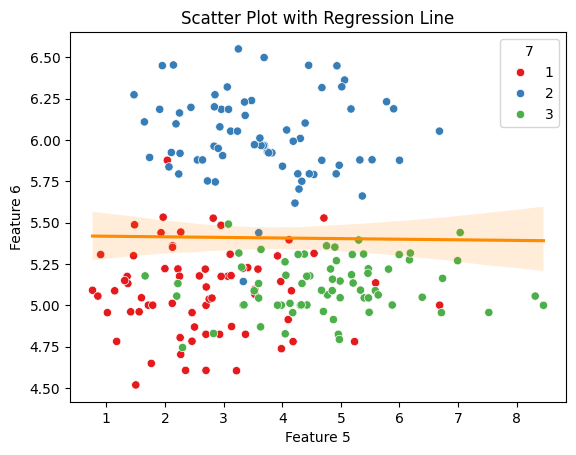

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line (compare col 5 with col 6)
sns.scatterplot(x=df.iloc[:, 5], y=df.iloc[:, 6], hue=df.iloc[:, 7], palette='Set1', legend=True)
sns.regplot(x=df.iloc[:, 5], y=df.iloc[:, 6], scatter=False, color='darkorange')

plt.xlabel('Feature 5')
plt.ylabel('Feature 6')
plt.title('Scatter Plot with Regression Line')

plt.show()

<Axes: >

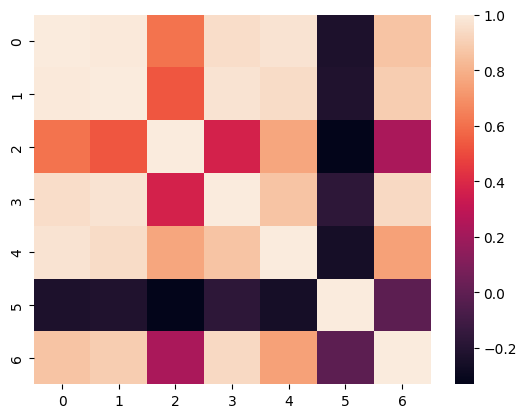

In [ ]:
sns.heatmap(df.iloc[:, :-1].corr()) #heatmap for correlation analysis

###***Now the model implementation***

In [ ]:
df[df.columns[7]] = df[df.columns[7]].replace([1, 2, 3], [0, 1, 2]) # make 1,2,3 into 0,1,2 respectively

In [ ]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
#df.drop(columns=[df.columns[7]], inplace=True) # drop the existing 7th column
df.columns = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'target'] # rename cols

In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

# split features and target
X = df.iloc[:, :-1] # features
y = df.iloc[:, -1]  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)  # 60 20 20 train val test

In [ ]:
X_train

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7
140,13.07,13.92,0.8480,5.472,2.994,5.304,5.395
178,11.48,13.05,0.8473,5.180,2.758,5.876,5.002
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
77,20.71,17.23,0.8763,6.579,3.814,4.451,6.451
...,...,...,...,...,...,...,...
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
14,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
92,18.81,16.29,0.8906,6.272,3.693,3.237,6.053
179,12.21,13.47,0.8453,5.357,2.893,1.661,5.178


In [ ]:
X_test

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7
98,18.17,16.26,0.8637,6.271,3.512,2.8530,6.273
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056
65,12.88,13.50,0.8879,5.139,3.119,2.3520,4.607
147,12.49,13.46,0.8658,5.267,2.967,4.4210,5.002
207,13.20,13.66,0.8883,5.236,3.232,8.3150,5.056
28,14.11,14.18,0.8820,5.541,3.221,2.7540,5.038
136,17.36,15.76,0.8785,6.145,3.574,3.5260,5.971
168,11.35,13.12,0.8291,5.176,2.668,4.3370,5.132
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607
205,12.19,13.20,0.8783,5.137,2.981,3.6310,4.870


In [ ]:
X_val

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453
199,12.76,13.38,0.8964,5.073,3.155,2.828,4.830
18,14.70,14.21,0.9153,5.205,3.466,1.767,4.649
82,20.20,16.89,0.8894,6.285,3.864,5.173,6.187
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961
180,11.41,12.95,0.8560,5.090,2.775,4.957,4.825
51,15.78,14.91,0.8923,5.674,3.434,5.593,5.136
56,14.46,14.35,0.8818,5.388,3.377,2.802,5.044


In [ ]:
y_test

98     1
30     0
65     0
147    2
207    2
28     0
136    1
168    2
60     0
205    2
197    2
86     1
132    1
78     1
135    1
19     0
67     0
118    1
150    2
38     0
187    2
192    2
159    2
16     0
196    2
12     0
155    2
68     0
69     0
104    1
200    2
26     0
165    2
79     1
182    2
31     0
139    1
93     1
35     0
142    2
29     0
126    1
Name: target, dtype: int64

In [ ]:
y_train

140    2
178    2
122    1
2      0
77     1
      ..
106    1
14     0
92     1
179    2
102    1
Name: target, Length: 126, dtype: int64

In [ ]:
y_val

97     1
199    2
18     0
82     1
9      0
208    2
45     0
180    2
51     0
56     0
24     0
156    2
124    1
73     1
125    1
162    2
25     0
100    1
108    1
96     1
203    2
170    2
66     0
101    1
41     0
5      0
128    1
115    1
95     1
173    2
172    2
117    1
55     0
84     1
109    1
76     1
143    2
75     1
146    2
42     0
15     0
183    2
Name: target, dtype: int64

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(126, 7) (126,)
(42, 7) (42,)
(42, 7) (42,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

### Models

1.  softmax with logit function (3 layers adam=0.001)
2.  softmax with no logit function (3 layers, adam=0.001)
3.  softmax(with logit) with dropout and batch normalization (5 layers, rmprop=0.05)

***logit function is between 0 and 1 but its used for multiclass classification for numerical stability purposes***

if logits is being used then output must be linear. if not then softmax can be used. both are valid for multiclass classification, using logits gives better stability as the predecessor layers of the output layer does not have softmax activation.(if the neural net always deals with probabilities in every layer then no need of logits)

In [ ]:
model1 = Sequential([
    Dense(12, activation='relu', input_dim=7),
    Dense(6, activation='relu'),
    Dense(3, activation='linear')
])

model2 = Sequential([
    Dense(12, activation='relu', input_dim=7),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model3 = Sequential([
    Dense(12, activation='relu', input_dim=7),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(6, activation='relu'),
    BatchNormalization(),  # Batch normalization layer
    Dense(3, activation='linear')
])

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])
model2.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['sparse_categorical_accuracy'])
model3.compile(optimizer=RMSprop(learning_rate=0.05), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 195 (780.00 Byte)
Trainable params: 195 (780.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                96        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 195 (780.00 Byte)
Trainable params: 195 (780.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                96        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 batch_normalization (Batch  (None, 6)                 24        
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 3)                 21        
                                                                 
Total params: 219 (876.00 Byte)
Trainable params: 207 (828.00 Byte)
Non-trainable params: 12 (48.00 Byte)
______________

In [ ]:
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 88ms/step - loss: 1.9875 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.7608 - val_sparse_categorical_accuracy: 0.3095
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1.8388 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.6311 - val_sparse_categorical_accuracy: 0.3095
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.7002 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.5240 - val_sparse_categorical_accuracy: 0.3095
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.5929 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.4414 - val_sparse_categorical_accuracy: 0.3095
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 1.4928 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.3860 - val_sparse_categorical_accuracy: 0.3095
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 1.4310 - sparse_categorical_accuracy: 

In [ ]:
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 1.1913 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.0522 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0011 - sparse_categorical_accuracy: 0.3730 - val_loss: 0.9173 - val_sparse_categorical_accuracy: 0.4762
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9387 - sparse_categorical_accuracy: 0.4206 - val_loss: 0.8853 - val_sparse_categorical_accuracy: 0.4524
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9285 - sparse_categorical_accuracy: 0.4286 - val_loss: 0.8661 - val_sparse_categorical_accuracy: 0.4762
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.9061 - sparse_categorical_accuracy: 0.4524 - val_loss: 0.8368 - val_sparse_categorical_accuracy: 0.4762
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8723 - sparse_categorical_accuracy: 

In [ ]:
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 79ms/step - loss: 1.2595 - sparse_categorical_accuracy: 0.2222 - val_loss: 2.2152 - val_sparse_categorical_accuracy: 0.4048
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0315 - sparse_categorical_accuracy: 0.4365 - val_loss: 4.3013 - val_sparse_categorical_accuracy: 0.4048
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0629 - sparse_categorical_accuracy: 0.4286 - val_loss: 1.5091 - val_sparse_categorical_accuracy: 0.4048
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0335 - sparse_categorical_accuracy: 0.5635 - val_loss: 1.1741 - val_sparse_categorical_accuracy: 0.4048
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9806 - sparse_categorical_accuracy: 0.4683 - val_loss: 0.9233 - val_sparse_categorical_accuracy: 0.5476
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.9481 - sparse_categorical_accuracy: 

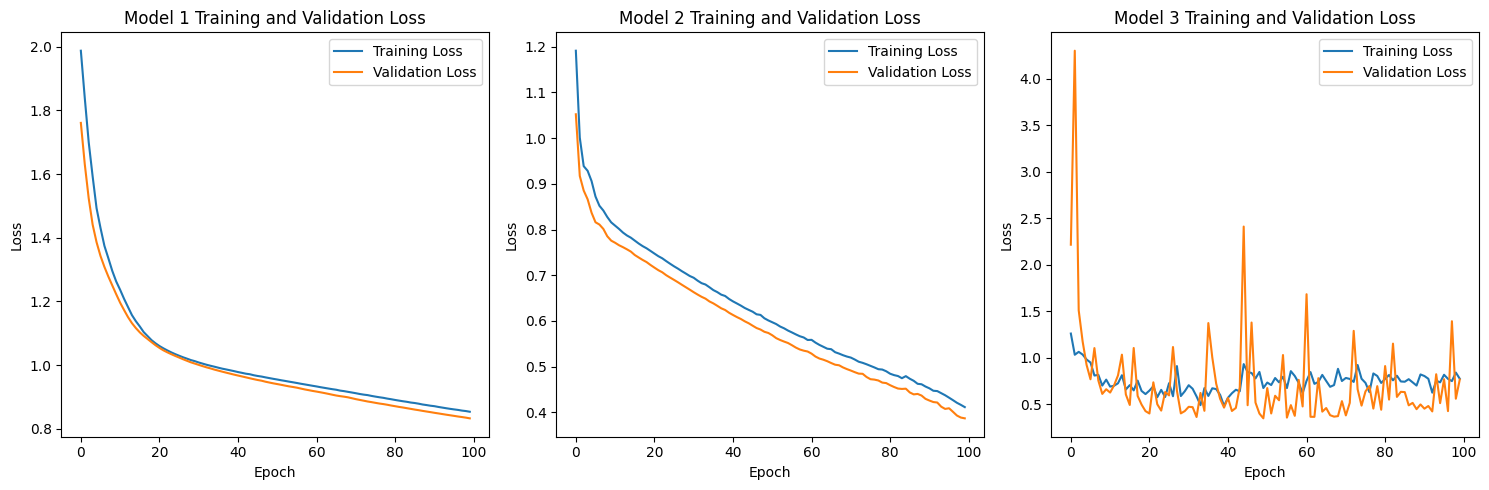

In [ ]:
# a 'history' object will be returned by the model.fit method, that object contains all the info like losses and accuracy
training_loss1 = history1.history['loss']
validation_loss1 = history1.history['val_loss']

training_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

training_loss3 = history3.history['loss']
validation_loss3 = history3.history['val_loss']

# Plot training and validation loss
# Create a figure with three subplots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# First subplot
plt.subplot(1, 3, 1)
plt.plot(training_loss1, label='Training Loss')
plt.plot(validation_loss1, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1 Training and Validation Loss')
plt.legend()

# Second subplot
plt.subplot(1, 3, 2)
plt.plot(training_loss2, label='Training Loss')
plt.plot(validation_loss2, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 2 Training and Validation Loss')
plt.legend()

# Third subplot
plt.subplot(1, 3, 3)
plt.plot(training_loss3, label='Training Loss')
plt.plot(validation_loss3, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 3 Training and Validation Loss')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

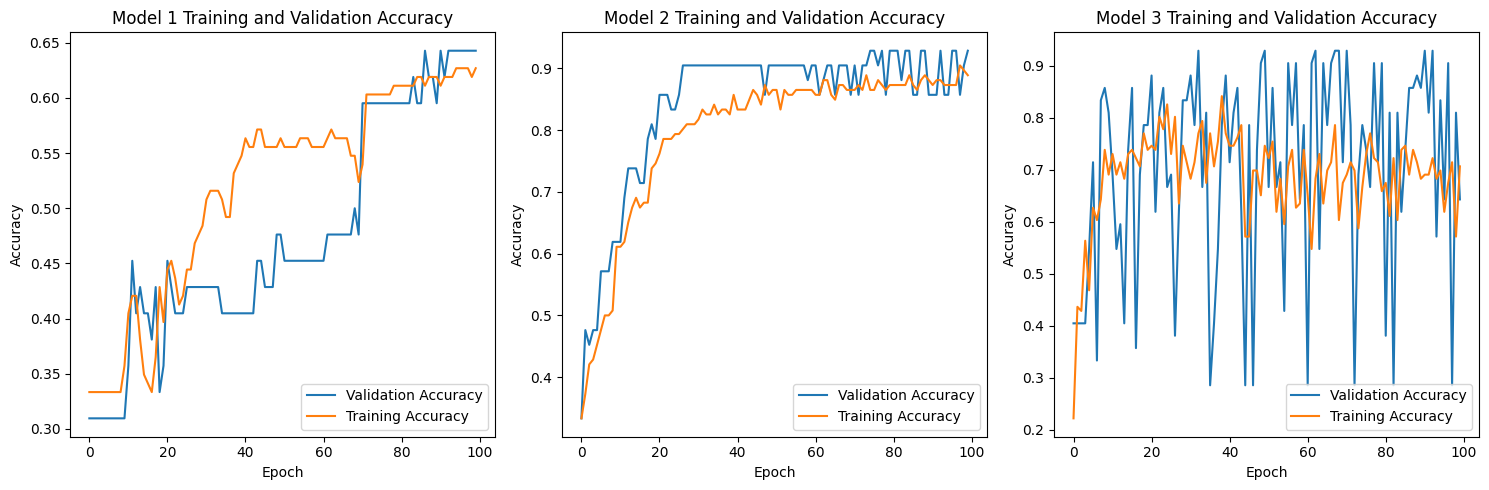

In [ ]:
validation_accuracy1 = history1.history['val_sparse_categorical_accuracy']
training_accuracy1 = history1.history['sparse_categorical_accuracy']

validation_accuracy2 = history2.history['val_sparse_categorical_accuracy']
training_accuracy2 = history2.history['sparse_categorical_accuracy']

validation_accuracy3 = history3.history['val_sparse_categorical_accuracy']
training_accuracy3 = history3.history['sparse_categorical_accuracy']

import matplotlib.pyplot as plt

# Create a figure with three subplots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# First subplot
plt.subplot(1, 3, 1)
plt.plot(validation_accuracy1, label='Validation Accuracy')
plt.plot(training_accuracy1, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 1 Training and Validation Accuracy')
plt.legend(loc='lower right')  # Place the legend at the lower right

# Second subplot
plt.subplot(1, 3, 2)
plt.plot(validation_accuracy2, label='Validation Accuracy')
plt.plot(training_accuracy2, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 2 Training and Validation Accuracy')
plt.legend(loc='lower right')  # Place the legend at the lower right

# Third subplot
plt.subplot(1, 3, 3)
plt.plot(validation_accuracy3, label='Validation Accuracy')
plt.plot(training_accuracy3, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 3 Training and Validation Accuracy')
plt.legend(loc='lower right')  # Place the legend at the lower right

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
val_loss1, val_accuracy1 = model1.evaluate(X_val, y_val) # check validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val, y_val)
val_loss3, val_accuracy3 = model3.evaluate(X_val, y_val)

2/2 [==============================] - 0s 10ms/step - loss: 0.7649 - sparse_categorical_accuracy: 0.6429


In [ ]:
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test) # check test set
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.8867 - sparse_categorical_accuracy: 0.5238


In [ ]:
predictions1

array([[ 9.8891306e-01,  1.1466353e+00, -1.2254251e+00],
       [ 8.3026624e-01,  9.6113998e-01, -1.0139070e+00],
       [ 4.7625601e-01,  5.4721898e-01, -5.4191750e-01],
       [-9.1531694e-02, -1.1665792e-01,  2.1509379e-01],
       [-1.5300728e-01, -1.8853730e-01,  2.9705703e-01],
       [ 5.1956892e-01,  5.9786195e-01, -5.9966516e-01],
       [ 7.4321783e-01,  8.5935992e-01, -8.9784837e-01],
       [-1.5300728e-01, -1.8853730e-01,  2.9705703e-01],
       [ 1.8982847e-01,  2.1231806e-01, -1.6003379e-01],
       [ 6.8869263e-02,  7.0888400e-02,  1.2368262e-03],
       [-2.7730957e-02, -4.2059898e-02,  1.3003051e-01],
       [ 1.1508747e+00,  1.3360064e+00, -1.4413630e+00],
       [ 2.5222683e-01,  2.8527641e-01, -2.4322736e-01],
       [ 5.6347662e-01,  6.4920032e-01, -6.5820569e-01],
       [ 5.0575262e-01,  5.8170742e-01, -5.8124435e-01],
       [ 2.5337413e-02,  1.9989446e-02,  5.9276327e-02],
       [ 6.2409735e-01,  7.2008014e-01, -7.3902917e-01],
       [ 9.2669821e-01,  1.0738

In [ ]:
predictions2

array([[0.2644215 , 0.7266332 , 0.00894528],
       [0.77427274, 0.12959044, 0.09613679],
       [0.71338683, 0.12885523, 0.15775792],
       [0.36411393, 0.03797989, 0.59790623],
       [0.22302674, 0.02313312, 0.7538401 ],
       [0.6802508 , 0.19285923, 0.12688991],
       [0.3863202 , 0.58799946, 0.02568038],
       [0.18369903, 0.00916497, 0.807136  ],
       [0.5250862 , 0.03630798, 0.4386057 ],
       [0.4674092 , 0.04474787, 0.48784292],
       [0.45188352, 0.08361805, 0.46449846],
       [0.15018062, 0.8488052 , 0.00101408],
       [0.53695685, 0.23449145, 0.22855178],
       [0.22975026, 0.76033944, 0.00991023],
       [0.55852735, 0.35746783, 0.08400483],
       [0.46609133, 0.05944546, 0.4744633 ],
       [0.70924354, 0.17233019, 0.11842634],
       [0.16156185, 0.83498675, 0.0034515 ],
       [0.15095358, 0.00818864, 0.84085786],
       [0.6339433 , 0.25283325, 0.11322338],
       [0.1801213 , 0.00706342, 0.81281525],
       [0.37777695, 0.02461883, 0.5976043 ],
       [0.

In [ ]:
predictions3

array([[ 0.9339769 ,  0.761938  , -1.3519554 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [ 0.6541726 ,  0.15282172, -0.7955149 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [ 1.3971791 ,  1.7703    , -2.2731152 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [ 1.1948225 ,  1.3297826 , -1.8706933 ],
       [ 0.09847614, -1.0568945 ,  0.3095861 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [ 1.3698988 ,  1.7109127 , -2.2188635 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.6309792 ],
       [-0.06313527, -1.4087124 ,  0.630

In [ ]:
predicted_classes1 = (predictions1.argmax(axis=-1) + 1) # 0 1 2 labels actually mean 1 2 3, so this line reverts that change done back into 1 2 3
predicted_classes2 = (predictions2.argmax(axis=-1) + 1)
predicted_classes3 = (predictions3.argmax(axis=-1) + 1)

In [ ]:
predicted_classes1

array([2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2])

In [ ]:
predicted_classes2

array([2, 1, 1, 3, 3, 1, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 1, 3, 3,
       3, 1, 3, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 2, 3, 1, 2])

In [ ]:
predicted_classes3

array([1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 2])